In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = pd.read_html(url, match='Регіон')
df = tables[0]

In [53]:
# Вивести перші рядки таблиці за допомогою методу head
print(df.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [54]:
# Визначення кількості рядків та стовпців
print(df.shape)

(28, 9)


In [55]:
# Заміна значень "—" на NaN
df.replace('—', np.nan, inplace=True)

In [56]:
# Визначення типів стовпців
print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [57]:
# Заміна типів нечислових стовпців на числові
for column in df.columns[1:]:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [58]:
# Розрахунок частки пропусків в кожному стовпці
print(df.isnull().sum() / len(df))

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [59]:
# Видалення даних по всій країні (останній рядок)
df = df.iloc[:-1]

In [60]:
# Заміна відсутніх даних середніми значеннями стовпців
numeric_columns = df.select_dtypes(include=[np.number]).columns
df.loc[:, numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [61]:
# Обчислення середнього рівня народжуваності по Україні у 2019 році
mean_birth_rate_2019 = df['2019'].mean()

In [62]:
# Отримання списку регіонів, де рівень народжуваності був вищим за середній у 2019 році
regions_above_average_2019 = df[df['2019'] > mean_birth_rate_2019]['Регіон']
print(regions_above_average_2019)

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


In [63]:
# Регіон з найвищою народжуваністю у 2014 році
highest_birth_rate_region = df['2014'].idxmax()
print(highest_birth_rate_region)


16


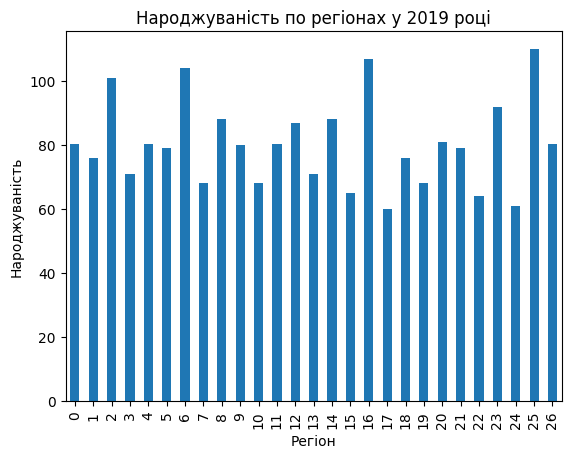

In [64]:
# Побудова стовпчикової діаграми народжуваності по регіонах у 2019 році
df['2019'].plot(kind='bar')
plt.title('Народжуваність по регіонах у 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність')
plt.show()